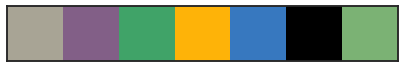

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from pprint import pprint
import re as re

from statsmodels.regression.mixed_linear_model import MixedLMResults

import scipy as sp
#from scipy.stats import nanmean
#from scipy.stats import nanstd
import copy
import scipy.stats as stats
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint
import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "dusty purple", "greenish", "amber", "windows blue", "black","faded green"]  
                     #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

import warnings
warnings.filterwarnings('ignore')


In [2]:
round_data = pd.read_csv('./all_studies_round_data.csv')

round_data['group'] = 1 #this is only for the crossed mixed effect model

game_rounds = pd.read_csv('./all_studies_game_data.csv')
#round_data = round_data[round_data.round_index > 3]
#print(round_data.size)
conditions = ['dynamic_full_feedback',
              'dynamic',         
              'dynamic_self_feedback',
              'dynamic_no_feedback',
              'static',
              'solo_feedback',
              'solo_no_feedback'
             ]


colors ={'dynamic_no_feedback':'#196FFF',
         'dynamic_self_feedback':'#000000',
         'dynamic_full_feedback':'#E89468',
         'dynamic': '#81B200',
         'static':'#9B59B6',
         'solo_feedback': '#95A5A6',
         'solo_no_feedback': '#95A5A6'
        }


linestyles ={'dynamic_no_feedback':'-.',
         'dynamic_self_feedback':':',
         'dynamic_full_feedback':'-',
         'dynamic': '-',
         'static':'--',
         'solo_feedback': '-',
         'solo_no_feedback': '-'
        }

markers ={'dynamic_no_feedback':'d',
         'dynamic_self_feedback':'^',
         'dynamic_full_feedback':'p',
         'dynamic': 'o',
         'static':'*',
         'solo_feedback': 'H',
         'solo_no_feedback': 'h'
        }

#markers = ['s','o','*']
#linestyles = ['--','-',':','-.']
tick_size = 25
label_size = 35




studies = [1,2]
#crossed model with no independent groups https://stackoverflow.com/questions/50052421/mixed-models-with-two-random-effects-statsmodels
# this is used as a variance component for the individual level stuff
vcf = {"player_id": "0 + C(player_id)", "game_id": "0 + C(game_id)"} 


# Table S3: Replication of the Dynamic condition (study 1 vs study 2)

## Table S3: Dynamic condition, study 1 vs Study 2 (individual) 

In [3]:
#### Study 2 dynamic full feedback vs study 1 dynamic full feedback

print("dynamic (study 1) vs dynamic full feedback (study 2): over all")
forumla = "revised_error ~ C(condition, Treatment('dynamic'))"
data = round_data[(round_data.condition.isin(['dynamic_full_feedback','dynamic'])) &  (round_data.revised_error.notnull())]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())

print('=============================')


print("dynamic (study 1) vs dynamic full feedback (study 2): first half")

forumla = "revised_error ~ C(condition, Treatment('dynamic'))"
data = round_data[
                  (round_data.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (round_data.half==1) &  (round_data.revised_error.notnull())
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())

print('=============================')

print("dynamic (study 1) vs dynamic full feedback (study 2): second half")

forumla = "revised_error ~ C(condition, Treatment('dynamic'))"
data = round_data[
                  (round_data.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (round_data.half==2) &  (round_data.revised_error.notnull())
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())


print('=============================')

print("dynamic (study 1) vs dynamic full feedback (study 2): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('dynamic'))"
data = round_data[
                  (round_data.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (round_data.quarter.isin([2,4])) &  (round_data.revised_error.notnull())
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print(model.summary())

dynamic (study 1) vs dynamic full feedback (study 2): over all
 β:  -0.0025369739475516215 , t-statistic -0.2630704232807636 , pvalue  0.792496300040277  ci  -0.021438291339704006 0.016364343444600762
dynamic (study 1) vs dynamic full feedback (study 2): first half
 β:  -0.0022982348411483004 , t-statistic -0.2043325204367966 , pvalue  0.8380936583964216  ci  -0.024342975967214447 0.019746506284917847
dynamic (study 1) vs dynamic full feedback (study 2): second half
 β:  -0.0027532272731033854 , t-statistic -0.19754559190727364 , pvalue  0.8434006071138543  ci  -0.030069586218075466 0.024563131671868698
dynamic (study 1) vs dynamic full feedback (study 2): adapted periods
 β:  0.0010566070178353352 , t-statistic 0.11087053337744238 , pvalue  0.9117190124695892  ci  -0.017622041290993613 0.019735255326664283


## Table S3: Dynamic condition, study 1 vs Study 2 (group) 

In [4]:
#### Study 2 dynamic full feedback vs study 1 dynamic full feedback

print("dynamic (study 1) vs dynamic full feedback (study 2): over all")
forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic'))"
data = game_rounds[(game_rounds.condition.isin(['dynamic_full_feedback','dynamic']))]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())

print('=============================')


print("dynamic (study 1) vs dynamic full feedback (study 2): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic'))"
data = game_rounds[
                  (game_rounds.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (game_rounds.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())

print('=============================')

print("dynamic (study 1) vs dynamic full feedback (study 2): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic'))"
data = game_rounds[
                  (game_rounds.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print (' ---- ')
#print(model.summary())


print('=============================')

print("dynamic (study 1) vs dynamic full feedback (study 2): adapted periods")
forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic'))"
data = game_rounds[
                  (game_rounds.condition.isin(['dynamic_full_feedback','dynamic'])) &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], ' ci ', model.conf_int()[0][1], model.conf_int()[1][1])#print(model.summary())

dynamic (study 1) vs dynamic full feedback (study 2): over all
 β:  0.0009102591390089572 , t-statistic 0.09069857110011698 , pvalue  0.9277321060501107  ci  -0.018760118325776634 0.02058063660379455
dynamic (study 1) vs dynamic full feedback (study 2): first half
 β:  -0.0030158369408370095 , t-statistic -0.26223654028974636 , pvalue  0.7931390837485541  ci  -0.02555629518801712 0.0195246213063431
dynamic (study 1) vs dynamic full feedback (study 2): second half
 β:  0.004836355218855029 , t-statistic 0.3327405974310441 , pvalue  0.7393301017122742  ci  -0.02365154832697724 0.033324258764687295
dynamic (study 1) vs dynamic full feedback (study 2): adapted periods
 β:  0.0040646632996632565 , t-statistic 0.41185842468171013 , pvalue  0.6804431953839256  ci  -0.015278375956553035 0.023407702555879546
